# How to make an Imbalanced Dataset usin g make Classification Library from sciKit Learn

In [3]:
!pip install pandas
!pip install numpy
!pip install matplotlib
! pip install seaborn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [30]:
# Impporting Important Files 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# Installing Scikit Learn Library
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
# Importing make_classification module of Sklearn Library to make dataset
from sklearn.datasets import make_classification

In [33]:
# Making X and y feauters from the make_classification function
X,y = make_classification(n_samples= 1000, n_features=2,n_clusters_per_class=1,n_redundant=0,weights=[0.9],random_state=1)

In [24]:
# Putting X and y into dataFrame 
data = pd.DataFrame(X, columns=["F1","F2"])

In [25]:
data["Target"] = y

In [26]:
data

,F1,F2,Target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0
...,...,...,...
995,2.210439,2.006772,0
996,1.910941,2.011860,0
997,-0.556625,-0.159837,0
998,1.004999,0.936290,0


# Now we have Succefully made the Imbalanced Classifia=cation Data, Lets Plot this on the Scatter plot to Visulaise it before handelling it  

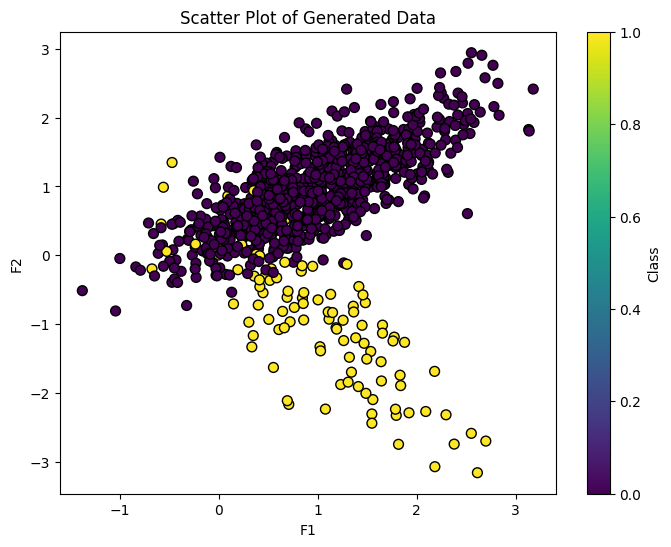

In [34]:
# Plotting the data ppints before handeling the imbalanced data
# Plotting the scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(data['F1'], data['F2'], c=data['Target'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('F1')
plt.ylabel('F2')
plt.title('Scatter Plot of Generated Data')
plt.colorbar(label='Class')
plt.show()

# Now Lets Resample the data to handle the imbalanced data points 


In [42]:
# First we may need to seperate the majority and Minority data 
data_major = data[data["Target"]==0]
data_minor = data[data["Target"]==1]

In [43]:
# Importing the important file to perform the resampling data
from sklearn.utils import resample

In [44]:
## Upsampling the Minority data Points 
data_minor_up = resample(data_minor,replace=True,n_samples=len(data_major),random_state=1)

In [45]:
## Now lets combine the upsampled datapoints of miority data points with the majority data points 
data_up = pd.concat([data_major,data_minor_up])

In [49]:
data_up["Target"].value_counts()

Target
0    894
1    894
Name: count, dtype: int64

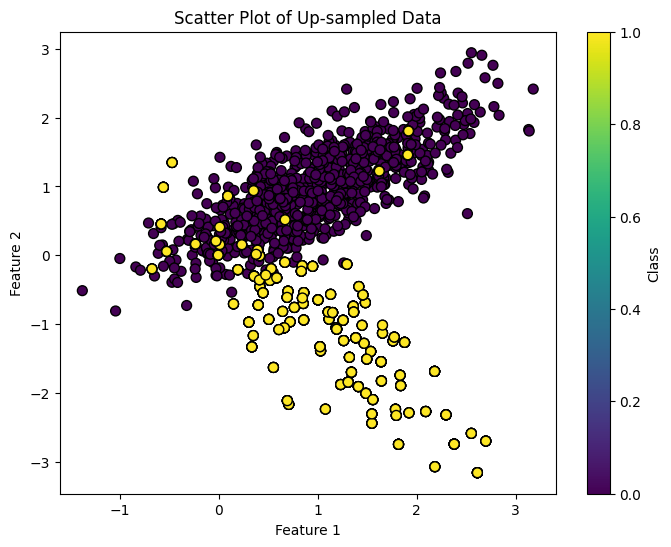

In [51]:
## Plotting the Upsampled data on the scatter plot 
# Plotting the up-sampled data
plt.figure(figsize=(8, 6))
plt.scatter(data_up['F1'], data_up['F2'], c=data_up['Target'], cmap='viridis', edgecolor='k', s=50)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Scatter Plot of Up-sampled Data')
plt.colorbar(label='Class')
plt.show()

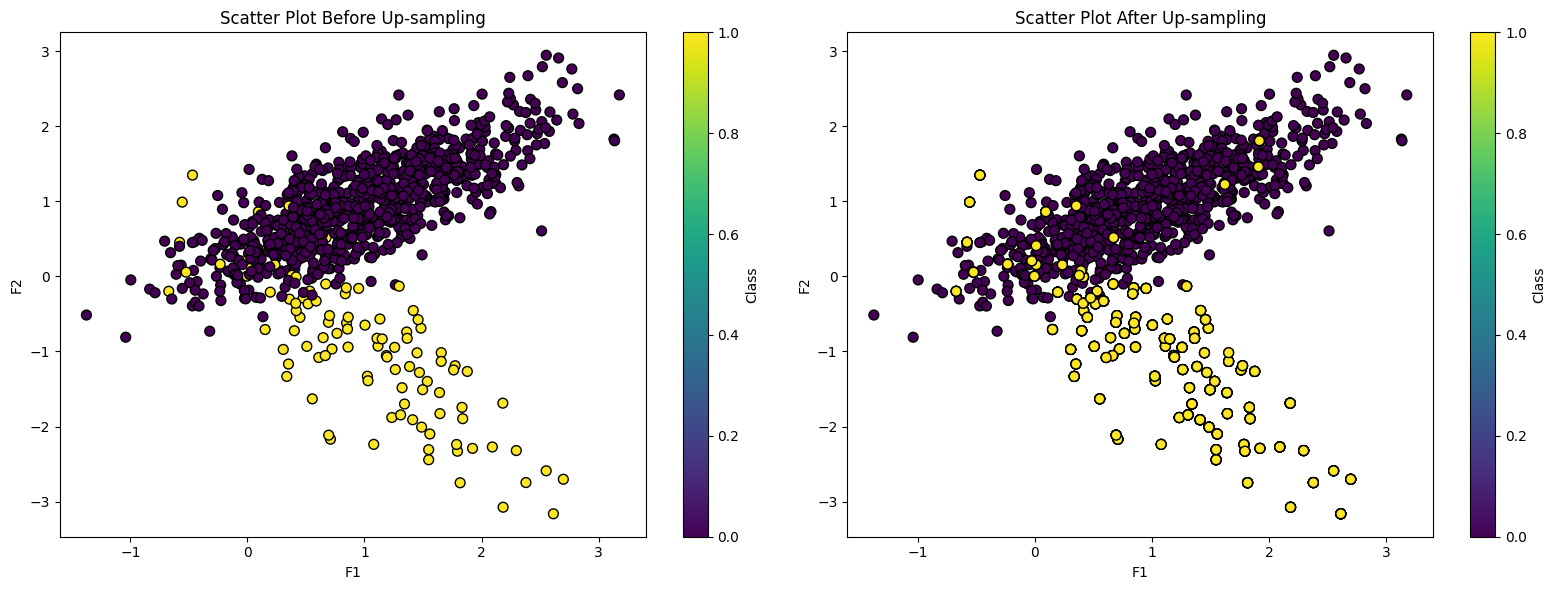

In [52]:
# Plotting the scatter plots before and after up-sampling
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Before up-sampling
ax1.scatter(data['F1'], data['F2'], c=data['Target'], cmap='viridis', edgecolor='k', s=50)
ax1.set_xlabel('F1')
ax1.set_ylabel('F2')
ax1.set_title('Scatter Plot Before Up-sampling')
ax1.colorbar = plt.colorbar(ax1.collections[0], ax=ax1, label='Class')

# After up-sampling
ax2.scatter(data_up['F1'], data_up['F2'], c=data_up['Target'], cmap='viridis', edgecolor='k', s=50)
ax2.set_xlabel('F1')
ax2.set_ylabel('F2')
ax2.set_title('Scatter Plot After Up-sampling')
ax2.colorbar = plt.colorbar(ax2.collections[0], ax=ax2, label='Class')

plt.tight_layout()
plt.show()